<a href="https://colab.research.google.com/github/Sahilshajahan/PFZ/blob/main/HSI_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
!wget "http://www.ehu.eus/ccwintco/uploads/6/67/Indian_pines_corrected.mat"

!wget "http://www.ehu.eus/ccwintco/uploads/c/c4/Indian_pines_gt.mat"   

--2022-11-16 16:16:31--  http://www.ehu.eus/ccwintco/uploads/6/67/Indian_pines_corrected.mat
Resolving www.ehu.eus (www.ehu.eus)... 158.227.0.65, 2001:720:1410::65
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.ehu.eus/ccwintco/uploads/6/67/Indian_pines_corrected.mat [following]
--2022-11-16 16:16:31--  https://www.ehu.eus/ccwintco/uploads/6/67/Indian_pines_corrected.mat
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5953527 (5.7M)
Saving to: ‘Indian_pines_corrected.mat’

Indian_pines_correc 100%[===================>]   5.68M  1.61MB/s    in 3.7s    

2022-11-16 16:16:35 (1.52 MB/s) - ‘Indian_pines_corrected.mat’ saved [5953527/5953527]

--2022-11-16 16:16:36--  http://www.ehu.eus/ccwintco/uploads/c/c4/Indian_pines_gt.mat
Resolving www.ehu.eus (www.ehu.eus)... 158.227.0.65, 2001:720:1410::65
Connectin

In [4]:
!ls

Indian_pines_corrected.mat  Indian_pines_gt.mat  sample_data


In [5]:
from scipy.io import loadmat

In [6]:
## Read the data.
dataset = loadmat('Indian_pines_corrected.mat')['indian_pines_corrected']
ground_truth = loadmat('Indian_pines_gt.mat')['indian_pines_gt']

In [7]:
#The dimensions of the data.
print(f'Dataset: {dataset.shape}\nGround Truth: {ground_truth.shape}')

Dataset: (145, 145, 200)
Ground Truth: (145, 145)


In [8]:
import numpy as np
import matplotlib.pyplot as plt

def plot_band(dataset):
    plt.figure(figsize=(8, 6))
    band_no = np.random.randint(dataset.shape[2])
    plt.imshow(dataset[:,:, band_no], cmap='jet')
    plt.title(f'Band-{band_no}', fontsize=14)
    plt.axis('off')
    plt.colorbar()
    plt.show()

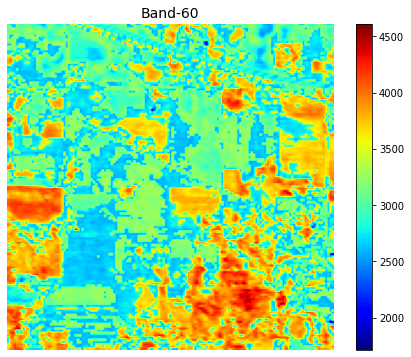

In [9]:
plot_band(dataset)

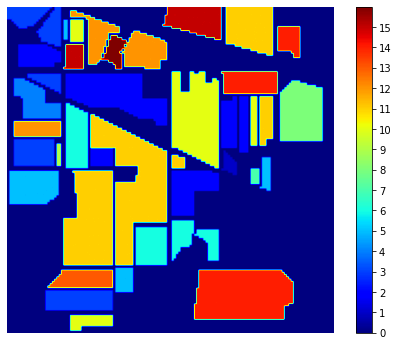

In [10]:
plt.figure(figsize=(8, 6))
plt.imshow(ground_truth, cmap='jet')
plt.axis('off')
plt.colorbar(ticks= range(0,16))
plt.show()

In [11]:
from tqdm import tqdm

In [12]:
dataset[:,:,2].ravel().shape

(21025,)

In [13]:
ser = pd.Series(dataset[0][0])

In [14]:
ser


0      3172
1      4142
2      4506
3      4279
4      4782
       ... 
195    1062
196    1069
197    1057
198    1020
199    1020
Length: 200, dtype: uint16

In [15]:
df_temp = pd.DataFrame()
temp = pd.Series([1,3])
df_temp = pd.concat([temp,ser])

In [16]:
df_temp

0         1
1         3
0      3172
1      4142
2      4506
       ... 
195    1062
196    1069
197    1057
198    1020
199    1020
Length: 202, dtype: int64

In [17]:
pd.DataFrame(dataset[0,0])

,0
0,3172
1,4142
2,4506
3,4279
4,4782
...,...
195,1062
196,1069
197,1057
198,1020


In [18]:
df_new = pd.DataFrame()
for i in tqdm(range(dataset.shape[0])):
    for j in range(dataset.shape[1]):
        df_new=pd.concat([df_new,pd.Series([i,j]),pd.Series(dataset[i,j])],axis=0)
            

100%|██████████| 145/145 [01:55<00:00,  1.26it/s]


In [20]:
row_list = []
for i in range(0,145):
    for j in range(0,145):
        row_list.append(i)
        
col_list = []
for i in range(0,145):
    for j in range(0,145):
        col_list.append(j)
        
row_series = pd.Series(row_list)
col_series = pd.Series(col_list)

In [21]:
row_series

0          0
1          0
2          0
3          0
4          0
        ... 
21020    144
21021    144
21022    144
21023    144
21024    144
Length: 21025, dtype: int64

In [23]:
dataset[:,:,0].shape

(145, 145)

In [24]:
from tqdm import tqdm
import pandas as pd
def extract_pixels(dataset, ground_truth):
    df = pd.DataFrame()
    df = pd.concat([df,row_series,col_series],axis=1)
    for i in tqdm(range(dataset.shape[2])):
        df = pd.concat([df, pd.DataFrame(dataset[:, :, i].ravel())], axis=1)
    df = pd.concat([df, pd.DataFrame(ground_truth.ravel())], axis=1)
    df.columns = ['pixel_row', 'pixel_col']+[f'band-{i}' for i in range(1, 1+dataset.shape[2])]+['class']
    return df

In [25]:
df = extract_pixels(dataset, ground_truth)

100%|██████████| 200/200 [00:01<00:00, 123.84it/s]


In [26]:
df.head()

,pixel_row,pixel_col,band-1,band-2,band-3,band-4,band-5,band-6,band-7,band-8,...,band-192,band-193,band-194,band-195,band-196,band-197,band-198,band-199,band-200,class
0,0,0,3172,4142,4506,4279,4782,5048,5213,5106,...,1094,1090,1112,1090,1062,1069,1057,1020,1020,3
1,0,1,2580,4266,4502,4426,4853,5249,5352,5353,...,1108,1104,1117,1091,1079,1085,1064,1029,1020,3
2,0,2,3687,4266,4421,4498,5019,5293,5438,5427,...,1111,1114,1114,1100,1065,1092,1061,1030,1016,3
3,0,3,2749,4258,4603,4493,4958,5234,5417,5355,...,1122,1108,1109,1109,1071,1088,1060,1030,1006,3
4,0,4,2746,4018,4675,4417,4886,5117,5215,5096,...,1110,1107,1112,1094,1072,1087,1052,1034,1019,3


In [27]:
df.shape

(21025, 203)

In [28]:
df.to_csv('Dataset.csv', index=False)

In [29]:
df.iloc[:,2]

0        3172
1        2580
2        3687
3        2749
4        2746
         ... 
21020    2561
21021    2726
21022    3153
21023    3155
21024    3323
Name: band-1, Length: 21025, dtype: uint16

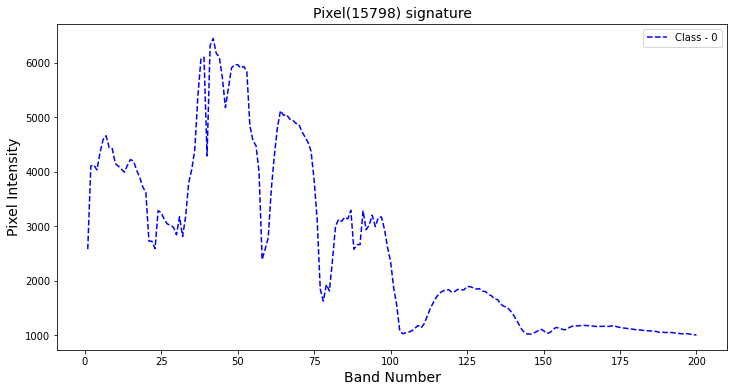

In [30]:
def plot_signature(df):
    plt.figure(figsize=(12, 6))
    pixel_no = np.random.randint(df.shape[0])
    plt.plot(range(1, 201), df.iloc[pixel_no, 2:-1].values.tolist(), 'b--', label= f'Class - {df.iloc[pixel_no, -1]}')
    plt.legend()
    plt.title(f'Pixel({pixel_no}) signature', fontsize=14)
    plt.xlabel('Band Number', fontsize=14)
    plt.ylabel('Pixel Intensity', fontsize=14)
    plt.show()
    
plot_signature(df)

In [31]:
df.loc[:,'class'].unique()

array([ 3,  0, 15, 11, 12,  5, 10, 14, 16,  2,  4,  8,  6,  9,  1,  7, 13],
      dtype=uint8)

In [32]:
df.loc[:, 'class'].value_counts()

0     10776
11     2455
2      1428
14     1265
10      972
3       830
6       730
12      593
5       483
8       478
15      386
4       237
13      205
16       93
1        46
7        28
9        20
Name: class, dtype: int64

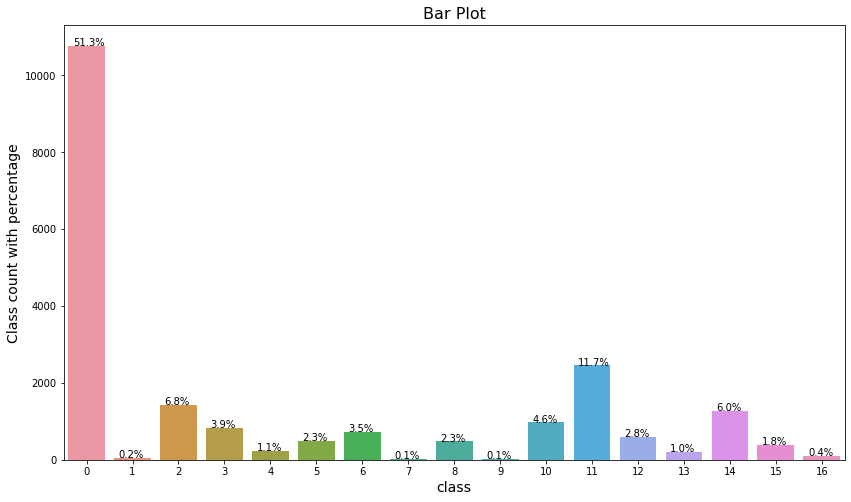

In [33]:
import seaborn as sns

plt.figure(figsize=(14, 8))

ax = sns.countplot(x='class', data=df[['class']])

for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/df.shape[0]), (p.get_x()+0.1, p.get_height()+5))

plt.ylabel('Class count with percentage', fontsize=14)

plt.xlabel('class', fontsize=14)

plt.title('Bar Plot', fontsize=16)

plt.show()

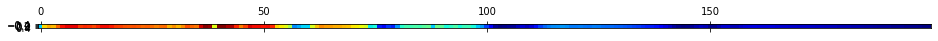

In [34]:
# Visualizing the pixel
plt.matshow(df.iloc[1, 2:-1].values.reshape(1,200), cmap='jet');

In [35]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
def plot_pixel(pixel, n):
    ax = plt.gca()
    im = ax.imshow(pixel.reshape(10, 20), cmap = 'jet')
    plt.title(f'pixel - {n}')
    plt.axis('off')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    plt.show()

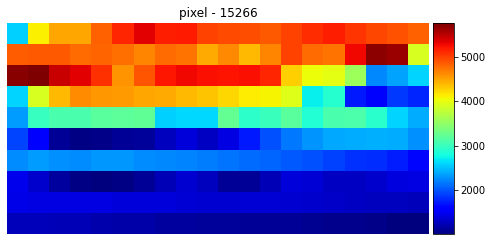

In [36]:
plt.figure(figsize=(8, 4))

rand_n = np.random.randint(df.shape[0])

plot_pixel(df.iloc[rand_n, 2:-1].values, rand_n)

In [37]:
type(df['band-1'])

pandas.core.series.Series

Enter the band Number(1-200) :10


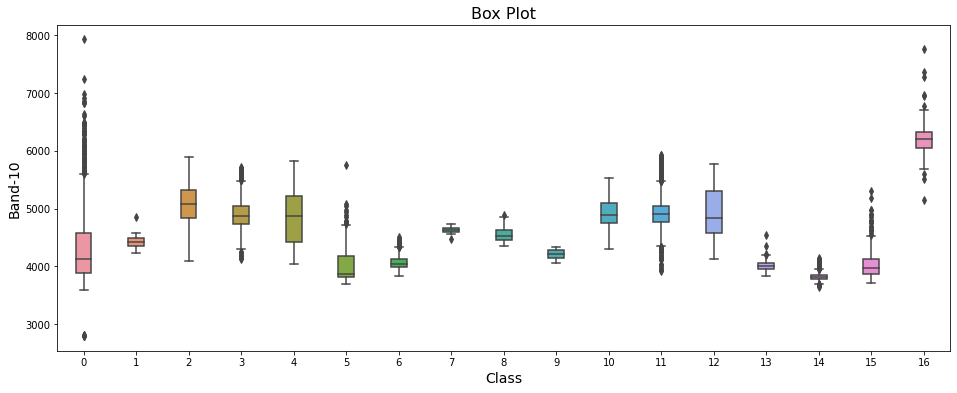

In [38]:
plt.figure(figsize=(16, 6))
n = int(input('Enter the band Number(1-200) :'))
sns.boxplot( x=df["class"], y=df[str('band-'+str(n))], width=0.3);
plt.title('Box Plot', fontsize= 16)
plt.xlabel('Class', fontsize= 14)
plt.ylabel(f'Band-{n}', fontsize= 14)
plt.show()

PCA+SVM

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [41]:
df = pd.read_csv('Dataset.csv')

In [42]:
df.head()

,pixel_row,pixel_col,band-1,band-2,band-3,band-4,band-5,band-6,band-7,band-8,...,band-192,band-193,band-194,band-195,band-196,band-197,band-198,band-199,band-200,class
0,0,0,3172,4142,4506,4279,4782,5048,5213,5106,...,1094,1090,1112,1090,1062,1069,1057,1020,1020,3
1,0,1,2580,4266,4502,4426,4853,5249,5352,5353,...,1108,1104,1117,1091,1079,1085,1064,1029,1020,3
2,0,2,3687,4266,4421,4498,5019,5293,5438,5427,...,1111,1114,1114,1100,1065,1092,1061,1030,1016,3
3,0,3,2749,4258,4603,4493,4958,5234,5417,5355,...,1122,1108,1109,1109,1071,1088,1060,1030,1006,3
4,0,4,2746,4018,4675,4417,4886,5117,5215,5096,...,1110,1107,1112,1094,1072,1087,1052,1034,1019,3


In [43]:
X = df.iloc[:, 2:-1].values

y = df.iloc[:, -1].values

In [44]:
X.shape,y.shape

((21025, 200), (21025,))

In [45]:
pca = PCA(n_components=30)
principalComponents = pca.fit_transform(X)
ev = pca.explained_variance_ratio_

In [46]:
ev

array([6.84937994e-01, 2.35313708e-01, 1.49635476e-02, 8.21541515e-03,
       6.95011265e-03, 5.17010703e-03, 3.99681431e-03, 3.62359687e-03,
       3.07127396e-03, 2.93211894e-03, 2.67352982e-03, 2.49230108e-03,
       2.24688362e-03, 1.89388744e-03, 1.69433603e-03, 1.56043409e-03,
       1.53162469e-03, 1.35012968e-03, 1.00138911e-03, 9.24868184e-04,
       8.47859608e-04, 7.64340559e-04, 6.64543577e-04, 6.45294117e-04,
       6.16301105e-04, 5.60834427e-04, 5.42992198e-04, 5.15225055e-04,
       4.19463825e-04, 3.63986193e-04])

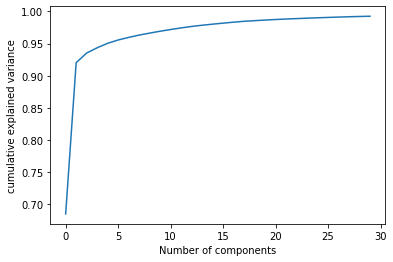

In [47]:
plt.plot(np.cumsum(ev))
plt.xlabel("Number of components")
plt.ylabel("cumulative explained variance")
plt.show()

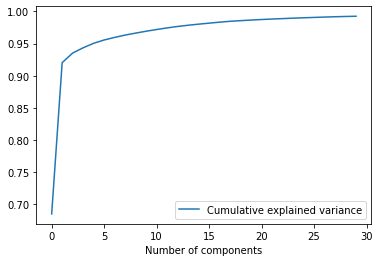

In [48]:
# Interactive plot
df3 = pd.DataFrame(ev, columns=['Cumulative explained variance']).cumsum()
df3['Number of components'] = pd.Series(list(range(30)))
df3.plot(x='Number of components', y='Cumulative explained variance')

In [50]:
X_train, X_test, y_train, y_test, indices_train, indices_test  = train_test_split(principalComponents, y,  range(X.shape[0]),
test_size = 0.15)

In [51]:
X_train.shape, X_test.shape

((17871, 30), (3154, 30))

SVM

In [52]:
svm = SVC(kernel='rbf', degree = 10, gamma='scale', cache_size=1024*7)
svm.fit(X_train, y_train)

SVC(cache_size=7168, degree=10)

In [53]:
y_pred = svm.predict(X_test)

In [54]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.7070386810399493


In [55]:
accuracy_list = []
for i in range(0,20):
    X_train, X_test, y_train, y_test, indices_train, indices_test  = train_test_split(principalComponents, y,  range(X.shape[0]), 
                                                                                  test_size = 0.15)
    svm = SVC(kernel='rbf', degree = 10, gamma='scale', cache_size=1024*7)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy_list.append(accuracy_score(y_test, y_pred))
    #print(f"Accuracy : {accuracy_score(y_test,y_pred)}")
    
print(f"Average accuracy: {sum(accuracy_list)/len(accuracy_list)}")

Average accuracy: 0.7153931515535827


In [59]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


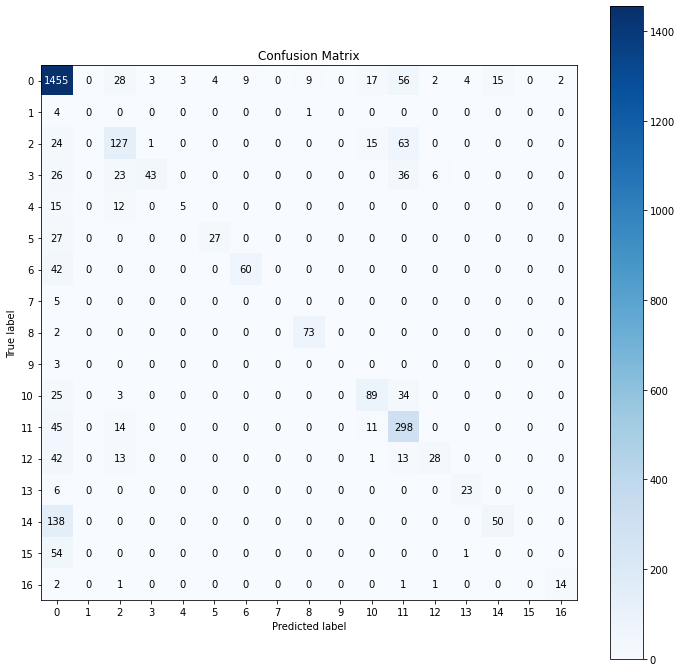

In [61]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test,
    y_pred,
    figsize=(12,12))

In [62]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
                   z= confusion_matrix(y_test, y_pred),
                   x=[f'class-{i}' for i in np.unique(df.loc[:, 'class'].values)],
                   y=[f'class-{i}' for i in np.unique(df.loc[:, 'class'].values)],
                   hoverongaps = False))
fig.show()

In [63]:
print('Classification report:\n',classification_report(y_test,y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.76      0.91      0.83      1607
           1       0.00      0.00      0.00         5
           2       0.57      0.55      0.56       230
           3       0.91      0.32      0.48       134
           4       0.62      0.16      0.25        32
           5       0.87      0.50      0.64        54
           6       0.87      0.59      0.70       102
           7       0.00      0.00      0.00         5
           8       0.88      0.97      0.92        75
           9       0.00      0.00      0.00         3
          10       0.67      0.59      0.63       151
          11       0.59      0.81      0.69       368
          12       0.76      0.29      0.42        97
          13       0.82      0.79      0.81        29
          14       0.77      0.27      0.40       188
          15       0.00      0.00      0.00        55
          16       0.88      0.74      0.80        19

  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [64]:
df.iloc[:,-1].values.reshape((145,145))

array([[3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

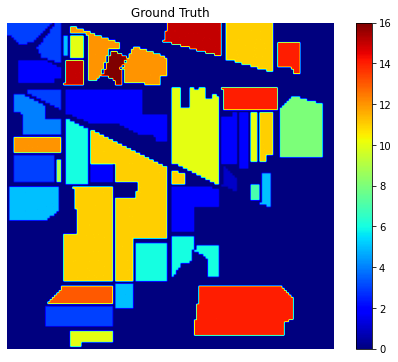

In [65]:
plt.figure(figsize=(8, 6))
plt.imshow(df.iloc[:, -1].values.reshape((145, 145)), cmap='jet')
plt.colorbar()
plt.axis('off')
plt.title('Ground Truth')
plt.savefig('ground_truth.png')
plt.show()

In [66]:
len([0]*X.shape[0])

21025

In [67]:
pre = y_pred
clmap = np.zeros((145,145))

for i in tqdm(range(len(indices_train))):
    clmap[df.iloc[indices_train[i], 0]][df.iloc[indices_train[i], 1]] = y[indices_train[i]]
    
for i in tqdm(range(len(indices_test))):
    clmap[df.iloc[indices_test[i], 0]][df.iloc[indices_test[i], 1]] = pre[i]

100%|██████████| 3154/3154 [00:00<00:00, 21738.39it/s]


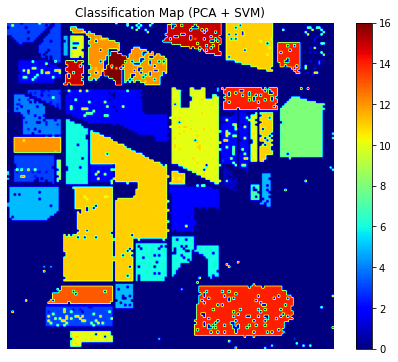

In [68]:
plt.figure(figsize=(8, 6))
plt.imshow(clmap, cmap='jet')
plt.colorbar()
plt.axis('off')
plt.title('Classification Map (PCA + SVM)')
plt.savefig('Classification_map.png')
plt.show()

In [69]:
from tqdm import tqdm
pre = y_pred

clmap = [0]*X.shape[0]

for i in tqdm(range(len(indices_train))):
    clmap[indices_train[i]] = y[indices_train[i]]

for i in tqdm(range(len(indices_test))):
    clmap[indices_test[i]] = pre[i]

100%|██████████| 3154/3154 [00:00<00:00, 802282.42it/s]


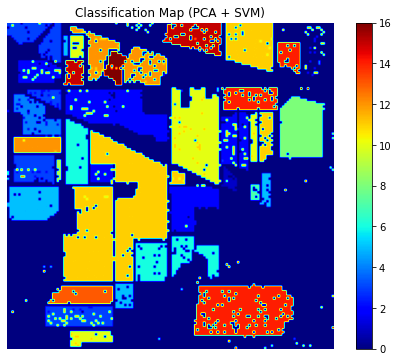

In [70]:
plt.figure(figsize=(8, 6))
plt.imshow(np.array(clmap).reshape((145, 145)), cmap='jet')
plt.colorbar()
plt.axis('off')
plt.title('Classification Map (PCA + SVM)')
plt.savefig('Classification_map.png')
plt.show()

Neural Network

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers, models, layers
from tensorflow.keras.callbacks import EarlyStopping

In [72]:
X_train.shape

(17871, 30)

In [74]:
model = Sequential()

model.add(Dense(150,activation='relu',kernel_regularizer=regularizers.l2(1e-4)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(100,activation='relu',kernel_regularizer=regularizers.l2(1e-4)))
model.add(BatchNormalization())

model.add(Dense(100,activation='relu',kernel_regularizer=regularizers.l2(1e-4)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(75,activation='relu',kernel_regularizer=regularizers.l2(1e-4)))
model.add(BatchNormalization())

model.add(Dense(75,activation='relu',kernel_regularizer=regularizers.l2(1e-4)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(50,activation='relu',kernel_regularizer=regularizers.l2(1e-4)))
model.add(BatchNormalization())

model.add(Dense(17,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [75]:
batch_size = 128
epochs = 200
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=20)
model.fit(x=X_train,
          y=y_train,
          epochs=epochs,
          validation_data=(X_test,y_test),
          verbose=0,
         callbacks=[early_stop])

Epoch 128: early stopping


In [76]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 150)               4650      
                                                                 
 batch_normalization (BatchN  (None, 150)              600       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               15100     
                                                                 
 batch_normalization_1 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 100)               1

In [77]:
score = model.evaluate(X_test,y_test, verbose=1)

99/99 [==============================] - 0s 1ms/step - loss: 0.5668 - accuracy: 0.8301


In [78]:
score

[0.5668267011642456, 0.8300570845603943]

In [79]:
y_pred = model.predict(X_test)

99/99 [==============================] - 0s 1ms/step


In [80]:
y_pred_classes = y_pred.argmax(axis=1)

In [81]:
y_pred_classes

array([11,  0,  0, ...,  0, 11,  6])

In [82]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy: ", accuracy_score(y_test, y_pred_classes))


Accuracy:  0.8300570703868104


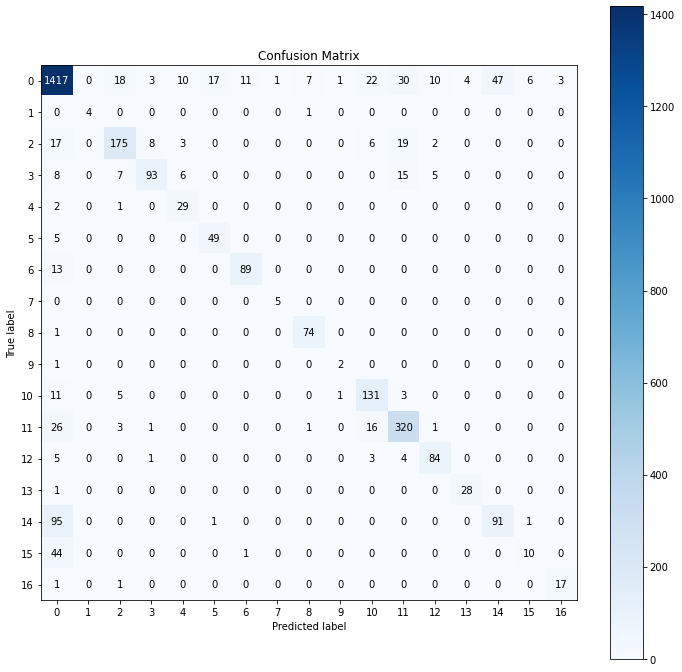

In [83]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test,
    y_pred_classes,
    figsize=(12,12))

In [84]:
print('Classification report:\n',classification_report(y_test,y_pred_classes))

Classification report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      1607
           1       1.00      0.80      0.89         5
           2       0.83      0.76      0.80       230
           3       0.88      0.69      0.78       134
           4       0.60      0.91      0.72        32
           5       0.73      0.91      0.81        54
           6       0.88      0.87      0.88       102
           7       0.83      1.00      0.91         5
           8       0.89      0.99      0.94        75
           9       0.50      0.67      0.57         3
          10       0.74      0.87      0.80       151
          11       0.82      0.87      0.84       368
          12       0.82      0.87      0.84        97
          13       0.88      0.97      0.92        29
          14       0.66      0.48      0.56       188
          15       0.59      0.18      0.28        55
          16       0.85      0.89      0.87        19

  

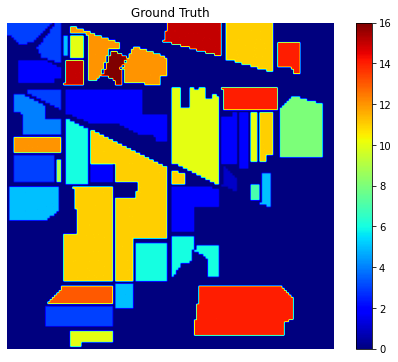

In [85]:
plt.figure(figsize=(8, 6))
plt.imshow(df.iloc[:, -1].values.reshape((145, 145)), cmap='jet')
plt.colorbar()
plt.axis('off')
plt.title('Ground Truth')
plt.savefig('ground_truth.png')
plt.show()

In [86]:
from tqdm import tqdm
pre = y_pred_classes

clmap = [0]*X.shape[0]

for i in tqdm(range(len(indices_train))):
    clmap[indices_train[i]] = y[indices_train[i]]

for i in tqdm(range(len(indices_test))):
    clmap[indices_test[i]] = pre[i]

100%|██████████| 3154/3154 [00:00<00:00, 1307584.74it/s]


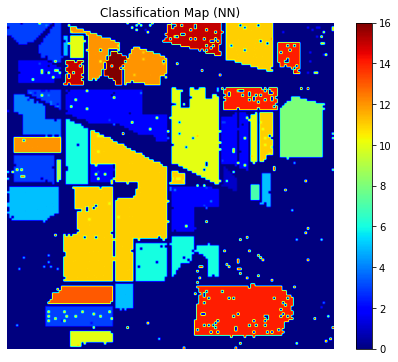

In [87]:
plt.figure(figsize=(8, 6))
plt.imshow(np.array(clmap).reshape((145, 145)), cmap='jet')
plt.colorbar()
plt.axis('off')
plt.title('Classification Map (NN)')
plt.savefig('Classification_map.png')
plt.show()